In [1]:
import tensorflow as tf
import importlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import utils_triplet1
import model1
importlib.reload(utils_triplet1)
importlib.reload(model1)
from utils_triplet1 import *
from model1 import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!p7zip -d /content/gdrive/MyDrive/Thesis/data.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/Thesis/                                         1 file, 3091371 bytes (3019 KiB)

Extracting archive: /content/gdrive/MyDrive/Thesis/data.7z
--
Path = /content/gdrive/MyDrive/Thesis/data.7z
Type = 7z
Physical Size = 3091371
Headers Size = 19318
Method = LZMA2:23
Solid = +
Blocks = 1

  0%     71% 893 - data/icon/medical/allergies.jpg                                          Everything is Ok

Folders: 75
Files: 1265
Size:       6443489
Compressed: 3091371


In [4]:
icons_test, sketches_test = get_icons_and_sketches()
#sketches_test = load_test_set()
icon_dictionary, sketch_dictionary = load_icons_sketches_dic(icons_test, sketches_test)

In [ ]:
weights_path_sketch = "/content/gdrive/MyDrive/Thesis/MyNet/Triplet Loss-CWI/27-03-2021 18-55-08/Train Weights/"
weights_path_icon = "/content/gdrive/MyDrive/Thesis/MyNet/Triplet Loss-CWI/27-03-2021 18-55-08/Train Weights/"
iconClassificationModel = mynet(66)
iconClassificationModel.load_weights(weights_path_icon + 'iconTripletWithCWI')
sketchClassificationModel = mynet(66)
sketchClassificationModel.load_weights(weights_path_sketch + 'sketchTripletWithCWI')
class_dic = {}
default_class_dic = {}
BATCH_SIZE = 128
acc_1 = 0
acc_10 = 0
sketch_representations = []
for j in range(0, len(sketches_test)):
  default_class_dic[sketches_test[j][1]] = default_class_dic.get(sketches_test[j][1], 0) + 1

for j in range(0, len(sketches_test), BATCH_SIZE):
  batch_sketches = sketches_test[j:j+BATCH_SIZE]
  sketches_array = get_batch_sketches(batch_sketches)
  sketch_repr,_ =  sketchClassificationModel(sketches_array, training = False)
  sketch_representations.append(sketch_repr)
sketch_representations = np.vstack(sketch_representations)

icon_representations = []
for j in range(0, len(icons_test), BATCH_SIZE):
  batch_icons = icons_test[j:j+BATCH_SIZE]
  icons_array = get_batch_icons(batch_icons)
  icons_repr,_ =  iconClassificationModel(icons_array, training = False)
  icon_representations.append(icons_repr)

icon_representations = np.vstack(icon_representations)

for k in range(len(sketch_representations)):
  sketch_repr = sketch_representations[k]
  sketch_representations_tile = np.tile(sketch_repr, len(icons_test)).reshape(len(icons_test), 64)
  diff = np.sqrt(np.mean((sketch_representations_tile - icon_representations)**2, -1))
  top_k = np.argsort(diff)[:10]
      
  for j in range(len(top_k)):
    index = top_k[j]
    if j == 0 and sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
      class_dic[sketches_test[k][1]] = class_dic.get(sketches_test[k][1], 0) + 1
      acc_1 = acc_1 + 1
      acc_10 = acc_10 + 1
      #break
    elif sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
      class_dic[sketches_test[k][1]] = class_dic.get(sketches_test[k][1], 0) + 1
      acc_10 = acc_10 + 1
      #break   
print("Accuracy of top 1: " + str(acc_1/len(sketches_test)))
print("Accuracy of top 10: " + str(acc_10/len(sketches_test)))
print(class_dic)
print(default_class_dic)

Accuracy of top 1: 0.3009433962264151
Accuracy of top 10: 0.7352201257861635
{'accessibility': 14, 'alert': 16, 'animals': 33, 'arrows': 178, 'audio-video': 67, 'automotive': 13, 'beverage': 23, 'buildings': 57, 'business': 55, 'camping': 25, 'charity': 20, 'chat': 22, 'chess': 20, 'clothing': 16, 'code': 39, 'communication': 75, 'computers': 57, 'construction': 24, 'currency': 56, 'date-time': 46, 'design': 90, 'editors': 120, 'education': 20, 'emoji': 166, 'energy': 23, 'files': 64, 'finance': 22, 'fitness': 12, 'food': 44, 'games': 38, 'gaming-tabletop': 16, 'gender': 22, 'halloween': 8, 'hands': 79, 'hotel': 11, 'household': 38, 'images': 14, 'interfaces': 77, 'logistics': 15, 'maps': 41, 'marketing': 18, 'mathematics': 39, 'medical': 84, 'moving': 10, 'music': 15, 'objects': 47, 'payments-shopping': 21, 'pharmacy': 12, 'political': 8, 'religion': 29, 'science': 2, 'science-fiction': 13, 'security': 22, 'shapes': 9, 'shopping': 17, 'social': 20, 'spinners': 9, 'sports': 25, 'status

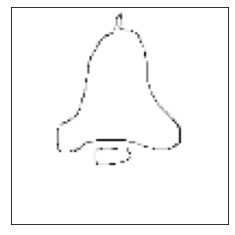

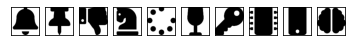

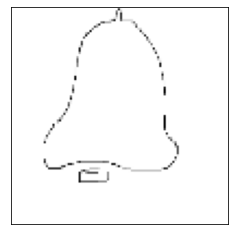

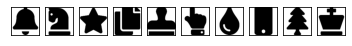

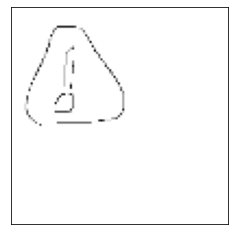

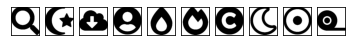

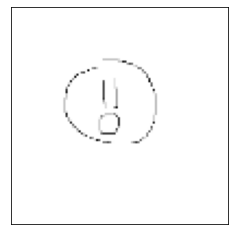

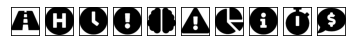

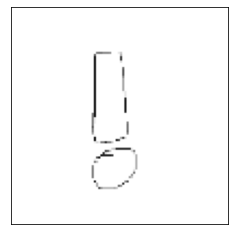

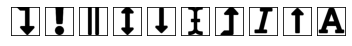

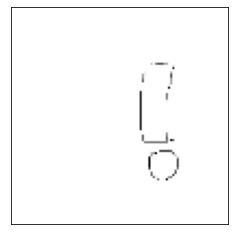

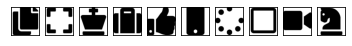

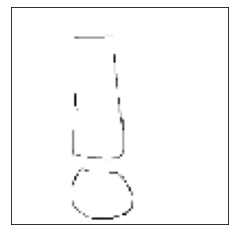

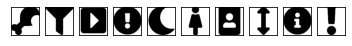

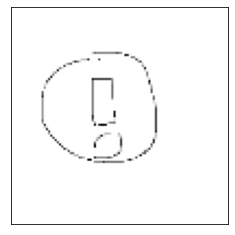

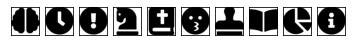

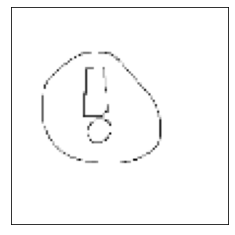

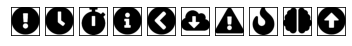

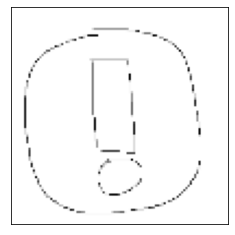

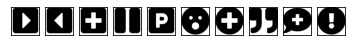

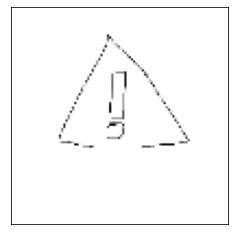

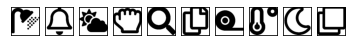

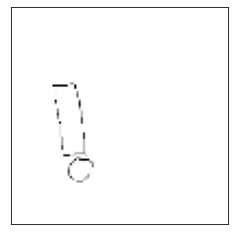

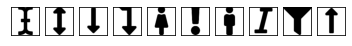

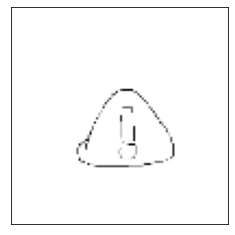

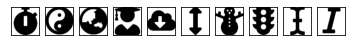

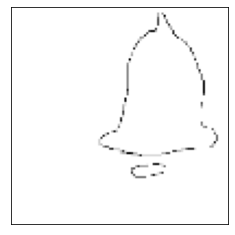

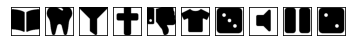

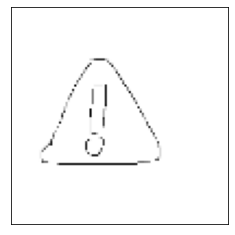

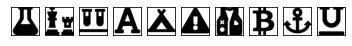

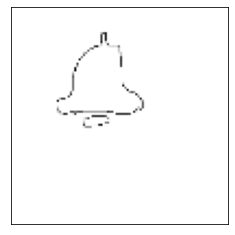

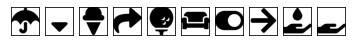

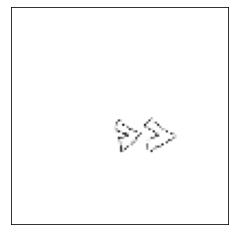

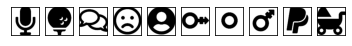

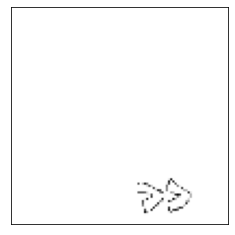

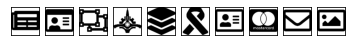

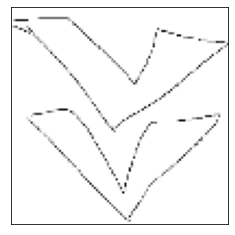

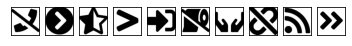

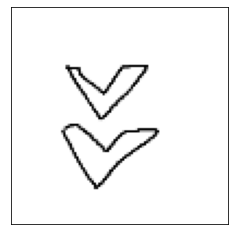

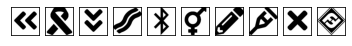

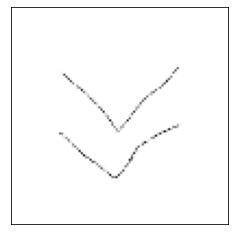

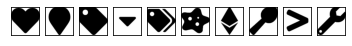

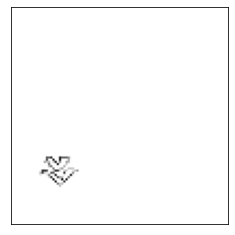

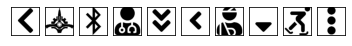

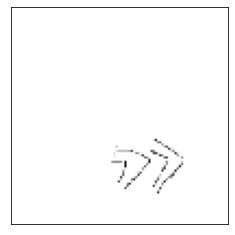

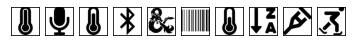

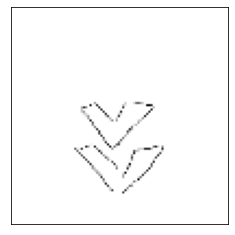

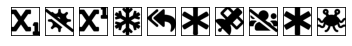

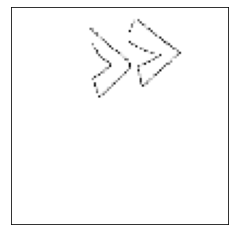

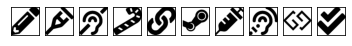

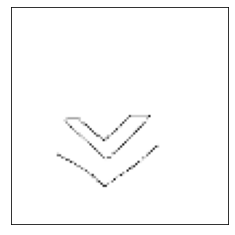

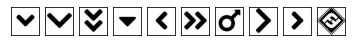

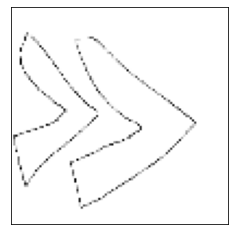

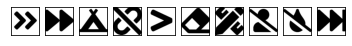

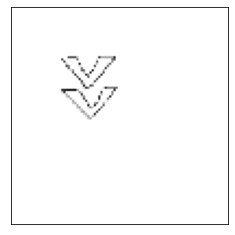

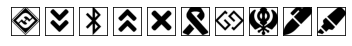

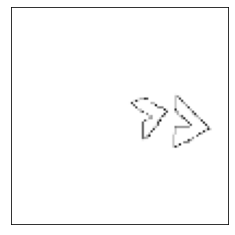

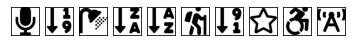

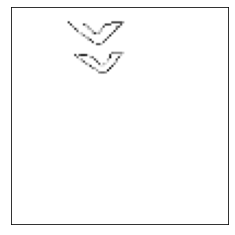

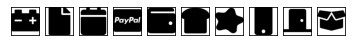

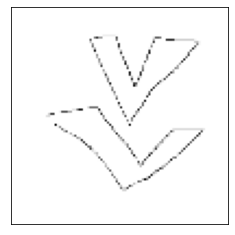

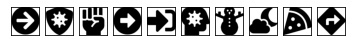

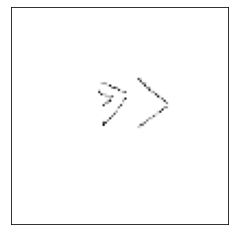

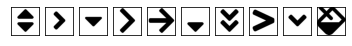

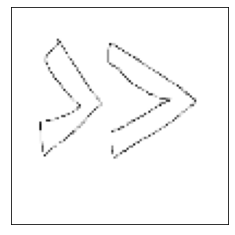

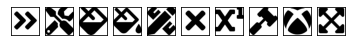

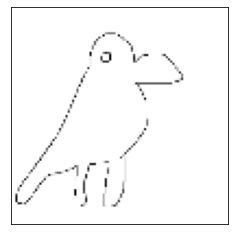

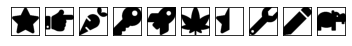

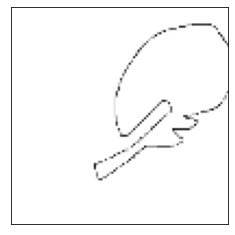

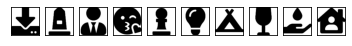

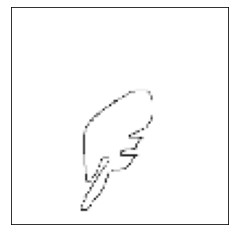

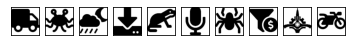

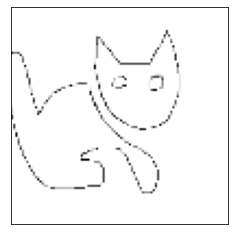

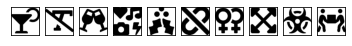

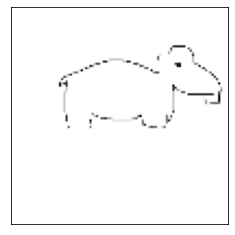

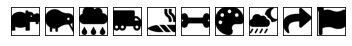

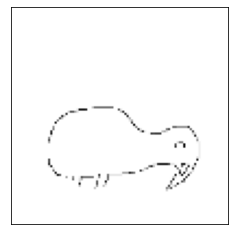

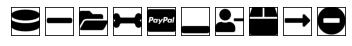

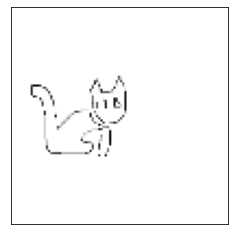

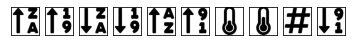

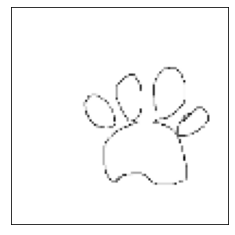

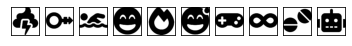

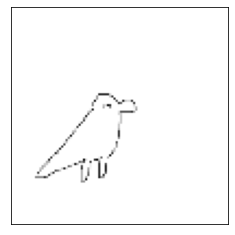

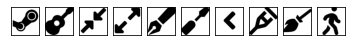

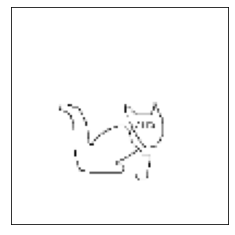

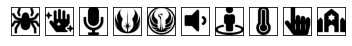

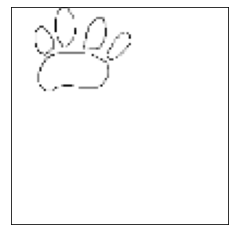

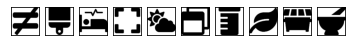

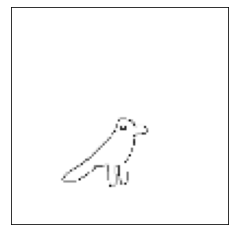

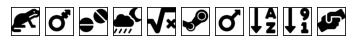

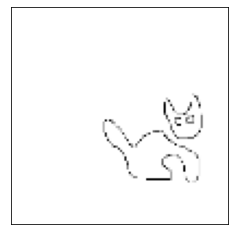

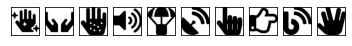

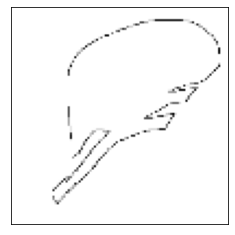

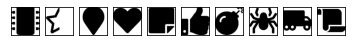

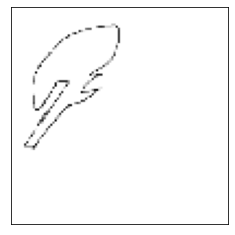

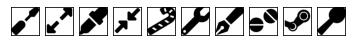

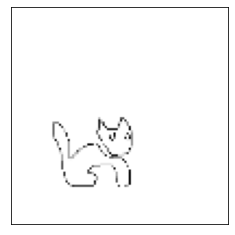

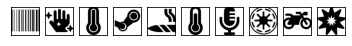

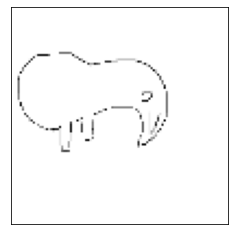

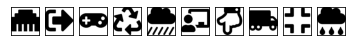

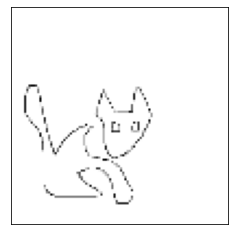

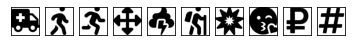

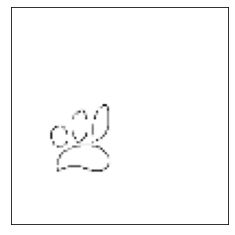

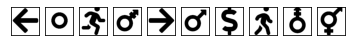

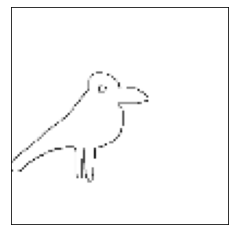

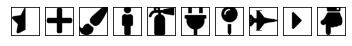

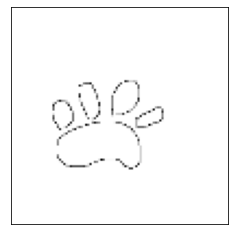

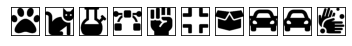

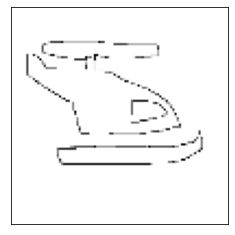

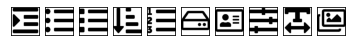

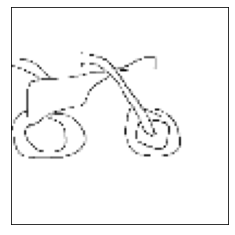

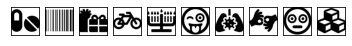

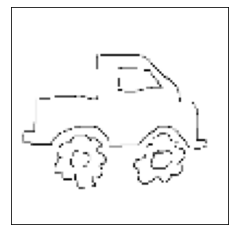

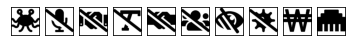

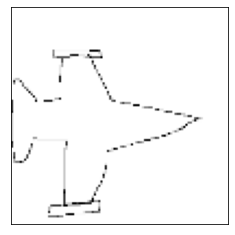

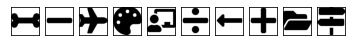

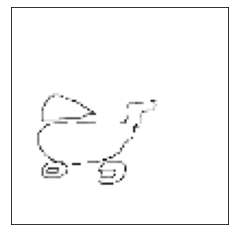

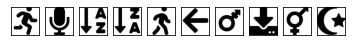

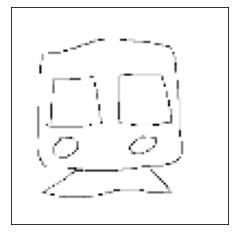

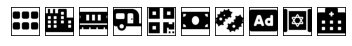

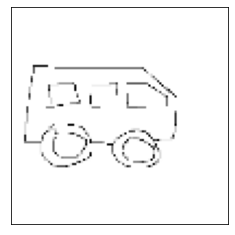

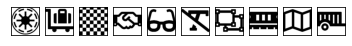

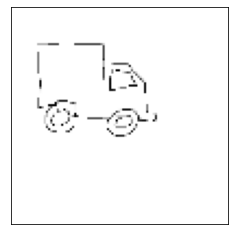

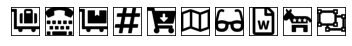

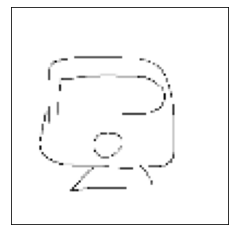

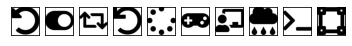

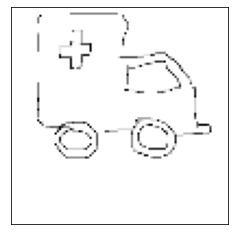

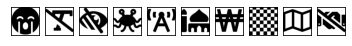

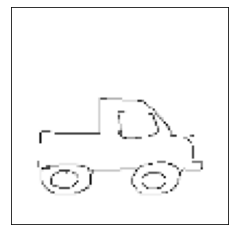

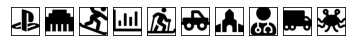

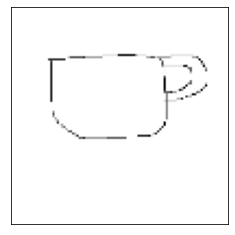

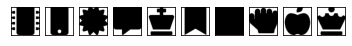

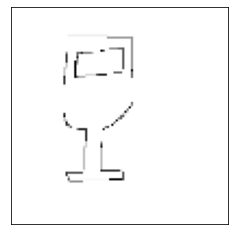

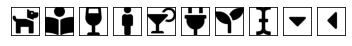

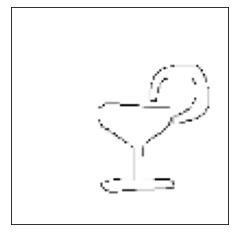

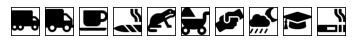

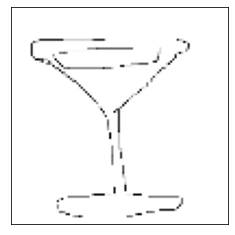

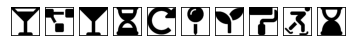

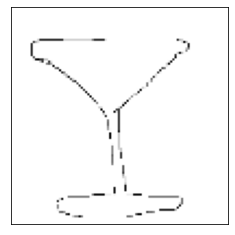

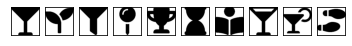

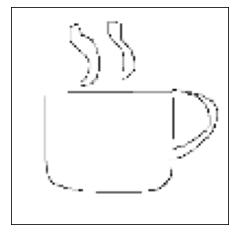

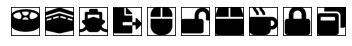

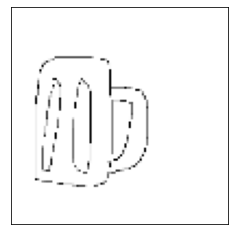

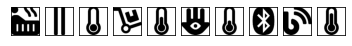

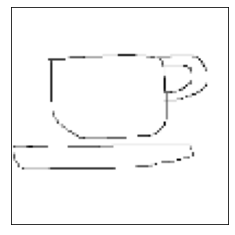

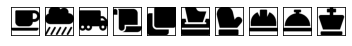

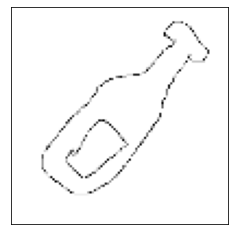

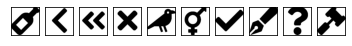

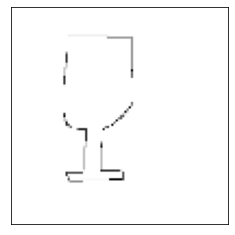

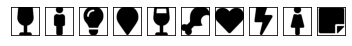

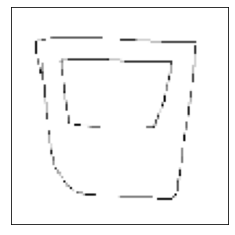

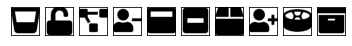

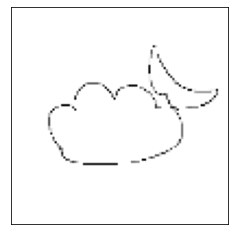

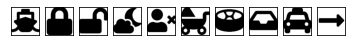

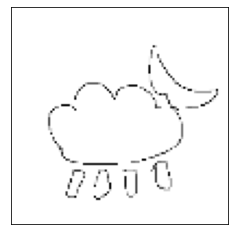

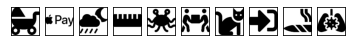

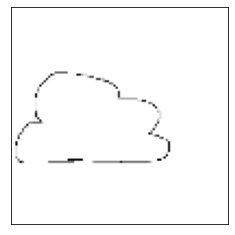

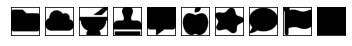

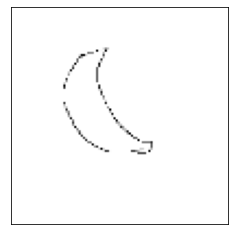

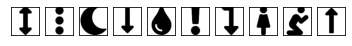

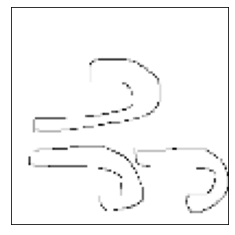

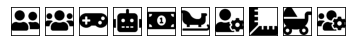

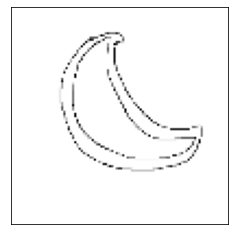

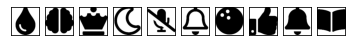

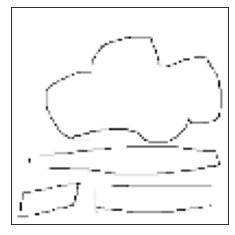

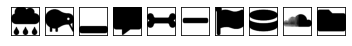

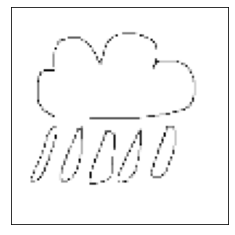

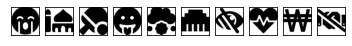

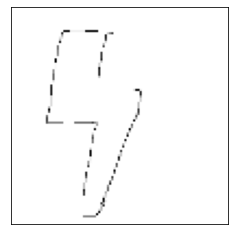

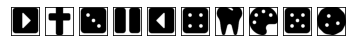

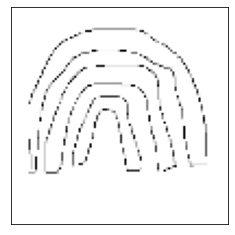

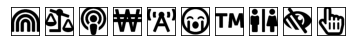

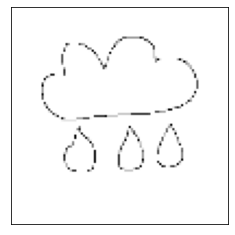

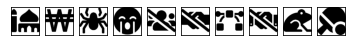

Accuracy of top 1: 0.16091954022988506
Accuracy of top 10: 0.367816091954023


In [5]:
weights_path_sketch = "/content/gdrive/MyDrive/Thesis/MyNet/Triplet Loss-CWI/28-03-2021 17-11-12/Train Weights/"
weights_path_icon = "/content/gdrive/MyDrive/Thesis/MyNet/Triplet Loss-CWI/28-03-2021 17-11-12/Train Weights/"
iconClassificationModel = mynet(66)
iconClassificationModel.load_weights(weights_path_icon + 'iconTripletWithCWI')
sketchClassificationModel = mynet(66)
sketchClassificationModel.load_weights(weights_path_sketch + 'sketchTripletWithCWI')
BATCH_SIZE = 128
acc_1 = 0
acc_10 = 0
sketch_representations = []
for j in range(0, len(sketches_test), BATCH_SIZE):
    batch_sketches = sketches_test[j:j+BATCH_SIZE]
    sketches_array = get_batch_sketches(batch_sketches)
    sketch_repr,_ =  sketchClassificationModel(sketches_array, training = False)
    sketch_representations.append(sketch_repr)
sketch_representations = np.vstack(sketch_representations)

icon_representations = []
for j in range(0, len(icons_test), BATCH_SIZE):
    batch_icons = icons_test[j:j+BATCH_SIZE]
    icons_array = get_batch_icons(batch_icons)
    icons_repr,_ =  iconClassificationModel(icons_array, training = False)
    icon_representations.append(icons_repr)

icon_representations = np.vstack(icon_representations)

for k in range(len(sketch_representations)):
    sketch_repr = sketch_representations[k]
    sketch_representations_tile = np.tile(sketch_repr, len(icons_test)).reshape(len(icons_test), 64)
    diff = np.sqrt(np.mean((sketch_representations_tile - icon_representations)**2, -1))
    top_k = np.argsort(diff)[:10]
    img = sketch_dictionary[sketches_test[k][0]]
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    
    for j in range(len(top_k)):
        index = top_k[j]
        if j == 0 and sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
            acc_1 = acc_1 + 1
            acc_10 = acc_10 + 1
            #break
        elif sketches_test[k][0].split("_")[0] == icons_test[index][0].replace(".jpg",""):
            acc_10 = acc_10 + 1
            #break
        img = icon_dictionary[icons_test[index][0]]
        plt.subplot(1, 10, j+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()     
print("Accuracy of top 1: " + str(acc_1/len(sketches_test)))
print("Accuracy of top 10: " + str(acc_10/len(sketches_test)))